In [1]:
!pip install pandas==2.2.3
!pip install plotly==6.0.0
!pip install matplotlib==3.10.0
!pip install seaborn==0.13.2
!pip install statsmodels==0.14.0
!pip install ydata_profiling==4.12.2

     ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
      --------------------------------------- 0.3/19.4 MB ? eta -:--:--
     - -------------------------------------- 0.8/19.4 MB 2.6 MB/s eta 0:00:08
     -- ------------------------------------- 1.3/19.4 MB 2.6 MB/s eta 0:00:07
     --- ------------------------------------ 1.6/19.4 MB 2.2 MB/s eta 0:00:09
     ---- ----------------------------------- 2.1/19.4 MB 2.3 MB/s eta 0:00:08
     ----- ---------------------------------- 2.6/19.4 MB 2.4 MB/s eta 0:00:07
     ------ --------------------------------- 3.1/19.4 MB 2.5 MB/s eta 0:00:07
     -------- ------------------------------- 3.9/19.4 MB 2.6 MB/s eta 0:00:07
     -------- ------------------------------- 4.2/19.4 MB 2.5 MB/s eta 0:00:07
     --------- ------------------------------ 4.7/19.4 MB 2.4 MB/s eta 0:00:07
     ---------- ----------------------------- 5.2/19.4 MB 2.5 MB/s eta 0:00:06
     ------------ --------------------------- 6.0/19.4 MB 2.5 MB/s

  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [87 lines of output]
  <string>:19: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  
  Error compiling Cython file:
  ------------------------------------------------------------
  ...
  cimport cython
  cimport numpy as np
  import numpy as np
  
  ctypedef np.float64_t DOUBLE
  ctypedef np.int_t INT
          ^
  ------------------------------------------------------------
  
  statsmodels\nonparametric\linbin.pyx:13:9: 'int_t' is not a type identifier
  Compiling statsmodels/tsa/stl/_stl.pyx because it depends on C:\Users\fmonc\AppData\Local\Temp\pip-build-env-4_lt8i4z\overlay\Lib\site-packages\Cython\Includes\libc\math.pxd.
  Compiling statsmodels/tsa/holtwinters/_exponential_smoothers.pyx because it depends on C:\Users\fmonc\AppData\Local\Temp\pip-build-env-4_lt8i4z\overlay\Lib\site-pac

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
from ydata_profiling import ProfileReport

import matplotlib.pyplot as plt
%matplotlib inline



ModuleNotFoundError: No module named 'ydata_profiling'

# Pandas Profiling

Pandas Profiling (https://docs.profiling.ydata.ai/latest/) is a leading package for data profiling, that automates and standardizes the generation of detailed reports, complete with statistics and visualizations. The significance of the package lies in how it streamlines the process of understanding and preparing data for analysis in a single line of code!

In [6]:
df = pd.read_csv('titanic.csv')


In [7]:
profile = ProfileReport(df, title="Profiling Report", explorative=True)


In [8]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [26]:
profile = ProfileReport(df, title="Profiling Report", explorative=True)
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
# Diabetes Diagnosis
# Glucose_Level, Age, HbA1c, BMI, Insulin_Resistance, Physical_Activity_Level, Family_History_Diabetes

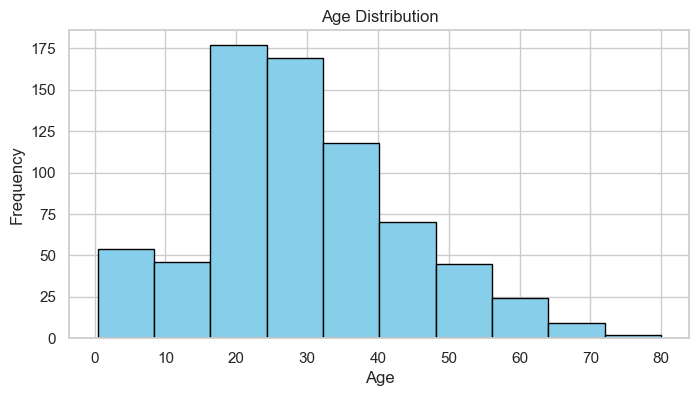

In [17]:
# %% [code]
# Histogram for Income Distribution
plt.figure(figsize=(8, 4))
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

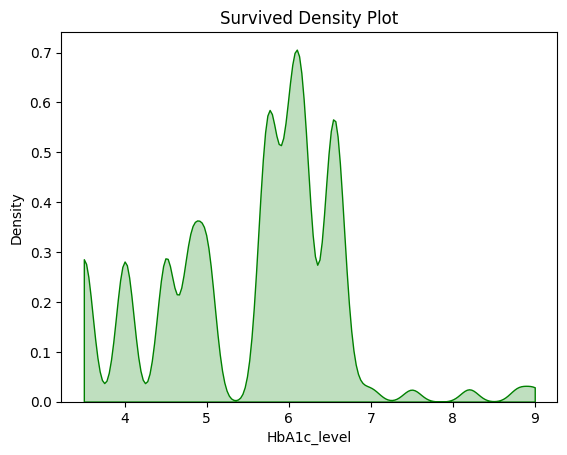

In [89]:
# %% [code]
# KDE Plot for BMI Distribution using Seaborn
x = "HbA1c_level"
sns.kdeplot(data=df, x=x, fill=True, color='green', clip=(min(df[x]), max(df[x])))
plt.title("Survived Density Plot")
plt.show()

In [37]:
df["age_level"] = df["age"].apply(lambda x: "young" if x<=25 else "adult" if x<=55 else "old")


In [42]:
df["age_gender"] = df["age_level"] + "_" + df["gender"]

In [43]:
df["age_gender"].unique()

array(['old_Female', 'adult_Female', 'adult_Male', 'old_Male',
       'young_Female', 'young_Male', 'young_Other', 'adult_Other'],
      dtype=object)

In [30]:
df["gender_c"] = df["gender"].apply(lambda x: 0 if x=="Female" else 1 if x=="Male" else 2) 

In [63]:
df["bglc"] = df["blood_glucose_level"].apply(lambda x: "high" if x>200 else "low")

In [68]:
df[df["bglc"]=="high"].shape[0]/df.shape[0]

0.03277

In [80]:
df["smoking_history"].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [84]:
df["hypertension"].unique()
df["sh_ht"] = df["smoking_history"] + df["hypertension"].astype(str)

In [85]:
df["sh_ht"].unique()

array(['never0', 'No Info0', 'current0', 'current1', 'former0', 'ever0',
       'not current0', 'never1', 'No Info1', 'not current1', 'ever1',
       'former1'], dtype=object)

In [81]:
df["sh_c"] = df["smoking_history"].apply(lambda x: "N" if x in ["never", "not current", "former"] else "Y" if x in ["current", "ever"] else "other") 

In [87]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'gender_c',
       'age_level', 'age_gender', 'bglc', 'sh_c', 'sh_ht'],
      dtype='object')

In [90]:
df["age_class"] = df["age"].apply(lambda x: "old" if x>55 else "other")
df["ht_class"] = "H"+ df["hypertension"].astype(str)
df["HbA1c_class"] = df["HbA1c_level"].apply(lambda x: "high" if x>5.5 else "other")
df["final_class"] = df["age_class"] + "_" + df["ht_class"] + "_" + df["HbA1c_class"]

In [ ]:
# %% [code]
# FacetGrid: Histogram of BMI separated by Gender
g = sns.FacetGrid(df, col="final_class")
g.map(sns.histplot, "diabetes", bins=20, color="teal")
plt.show()

y = a*x1+ b*x2
x1, x2 features
regression:
find a, b such that |y-a*x1-b*x2| is small
a/(a+b), b/(a+b) is a feature importance

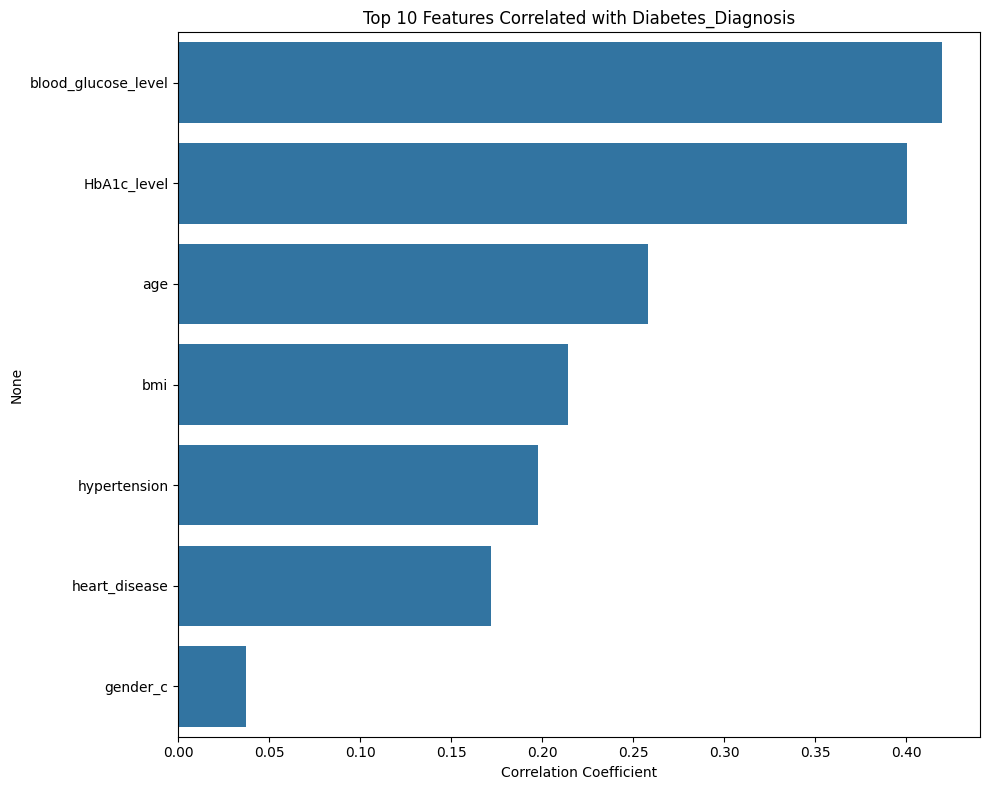

diabetes                 1.000 (Strong)
blood_glucose_level    0.420 (Moderate)
HbA1c_level            0.401 (Moderate)
age                    0.258 (Moderate)
bmi                    0.214 (Moderate)
hypertension           0.198 (Moderate)
heart_disease          0.172 (Moderate)
gender_c               0.037 (Moderate)
Name: diabetes, dtype: object

In [32]:
numeric_db = df.select_dtypes(include = ['int64', 'float64'])

correlation = numeric_db.corr()['diabetes'].sort_values(ascending = False)


plt.figure(figsize = (10,8))
top_features = correlation[1:]
sns.barplot(x = top_features.values, y = top_features.index)
plt.title('Top 10 Features Correlated with Diabetes_Diagnosis')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

correlation.apply(lambda x: f"{x:.3f} ({'Strong' if abs(x) > 0.5 else 'Moderate' if abs(x) > 0.03 else 'Weak'})").head(10)

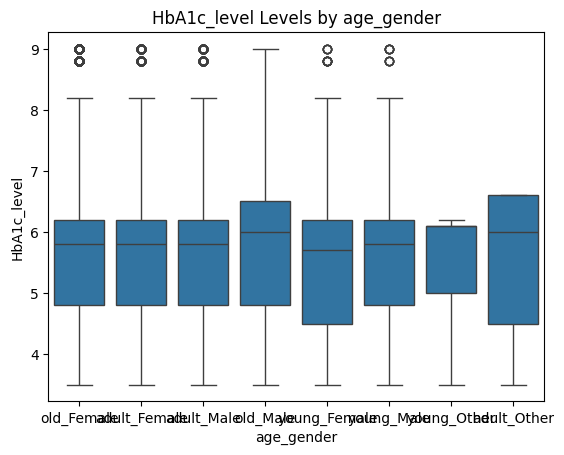

In [48]:
# %% [code]
# Box Plot: Fare levels by Age

x = "age_gender"
y = "HbA1c_level"
sns.boxplot(x=x, y=y, data=df)
plt.title(f"{y} Levels by {x}")
plt.show()

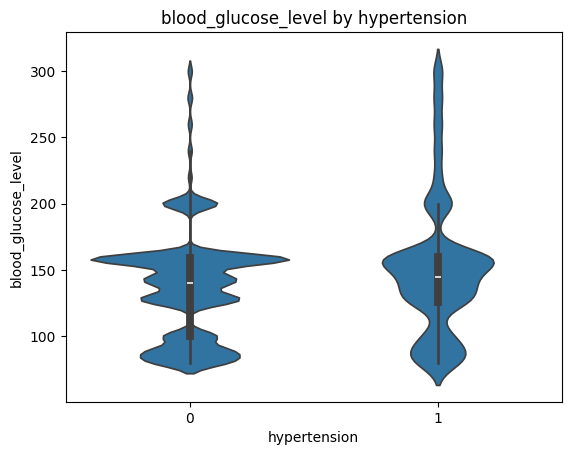

In [60]:
# %% [code]
# Violin Plot: Glucose Level by Smoking Status

x = "hypertension"
y = "blood_glucose_level"

sns.violinplot(x=x, y=y, data=df)
plt.title(f"{y} by {x}")
plt.show()

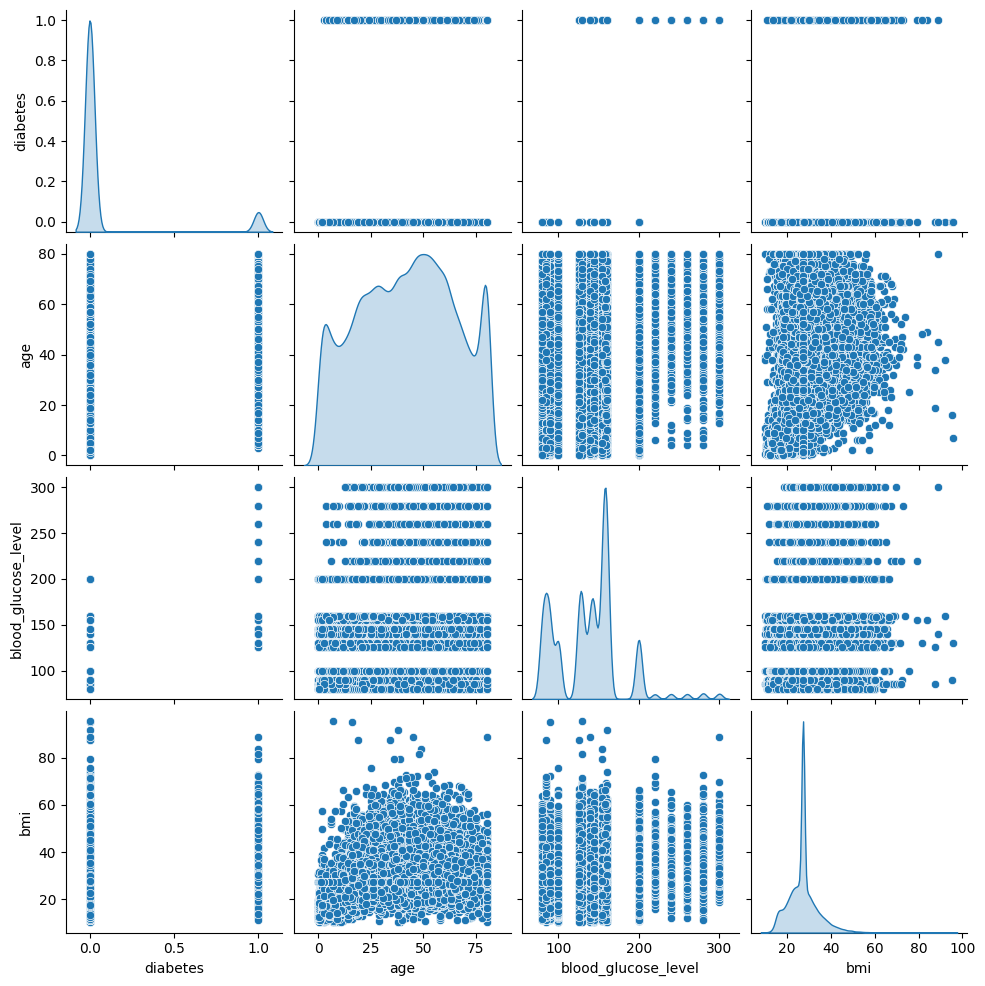

In [62]:
# %% [code]
# Pair Plot for a subset of numerical variables
sns.pairplot(df[['diabetes', 'age', 'blood_glucose_level', 'bmi']], diag_kind='kde')
plt.show()

/Users/andrealelli/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 21.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/andrealelli/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 57.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/andrealelli/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 78.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/andrealelli/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 29.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/andrealelli/anaconda3/lib/python3.11/

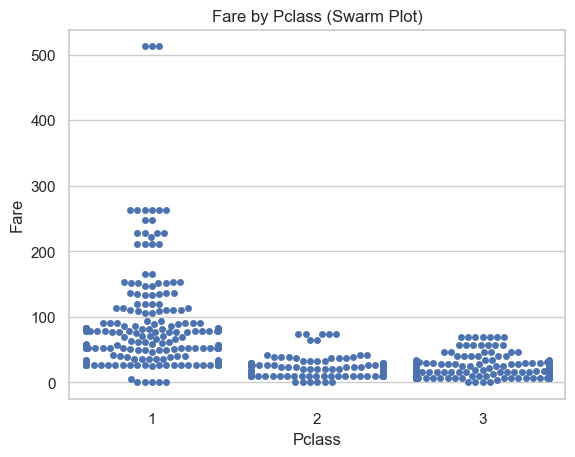

In [42]:
# %% [code]
# Swarm Plot: BMI by Gender

x = "Pclass"
y = "Fare"
sns.swarmplot(x=x, y=y, data=df)
plt.title(f"{y} by {x} (Swarm Plot)")
plt.show()

/var/folders/ct/c0klcjvj2wz7y1hkljbmmz3r0000gn/T/ipykernel_80262/1161511241.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=df, palette='pastel')


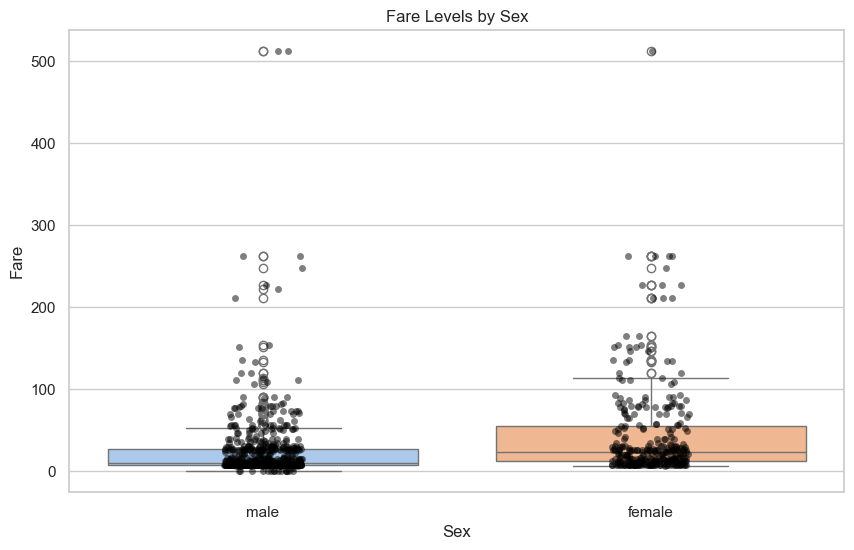

In [43]:
# %% [code]
# Combine a Box Plot and Strip Plot 
plt.figure(figsize=(10, 6))
x = "Sex"
y = "Fare"
sns.boxplot(x=x, y=y, data=df, palette='pastel')
sns.stripplot(x=x, y=y, data=df, color='black', alpha=0.5)
plt.title(f"{y} Levels by {x}")
plt.show()

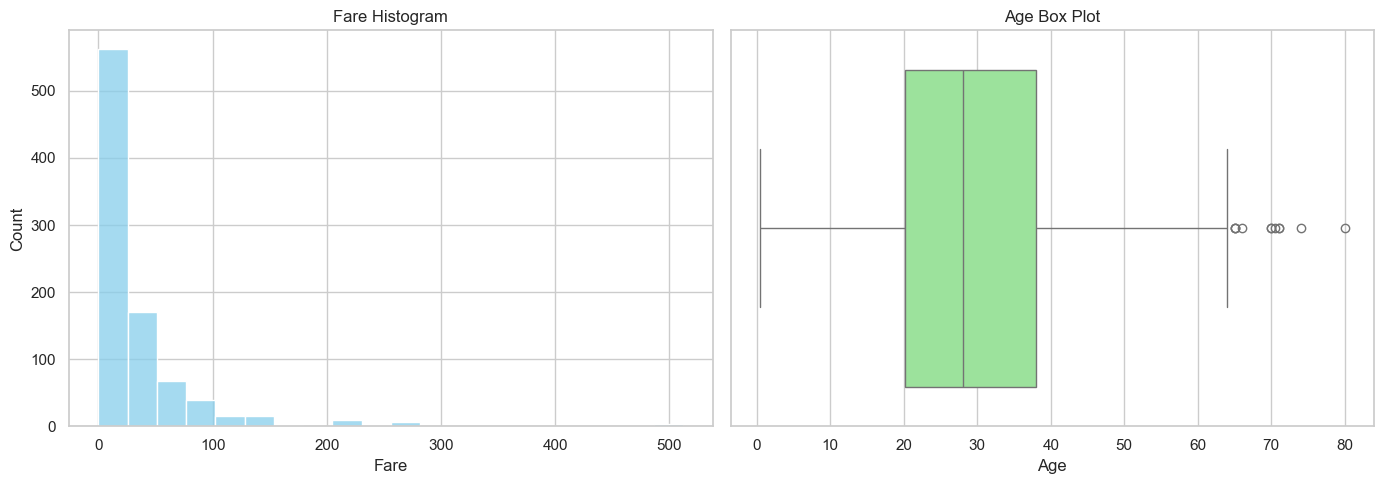

In [86]:
# Subplots: Income Histogram and Income Box Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df['Fare'], bins=20, ax=axes[0], color='skyblue')
axes[0].set_title("Fare Histogram")
sns.boxplot(x=df['Age'], ax=axes[1], color='lightgreen')
axes[1].set_title("Age Box Plot")
plt.tight_layout()
plt.show()

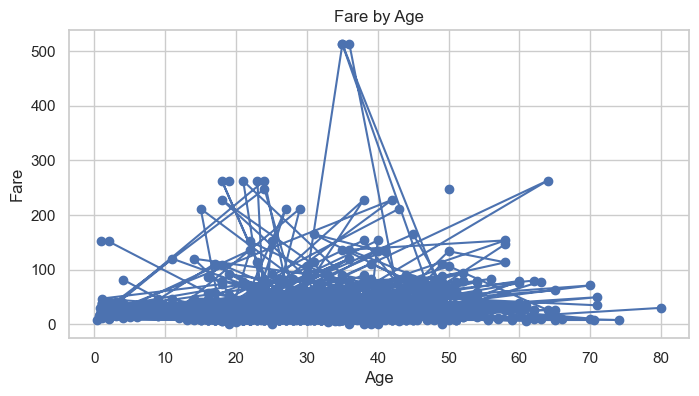

In [45]:
# %% [code]
df["Age_in_5_years"] = df["Age"]+5
# Line Plot: Fare vs. Age
plt.figure(figsize=(8, 4))
plt.plot(df['Age'], df['Fare'], marker='o', linestyle='-', color='b')
plt.title("Fare by Age")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()


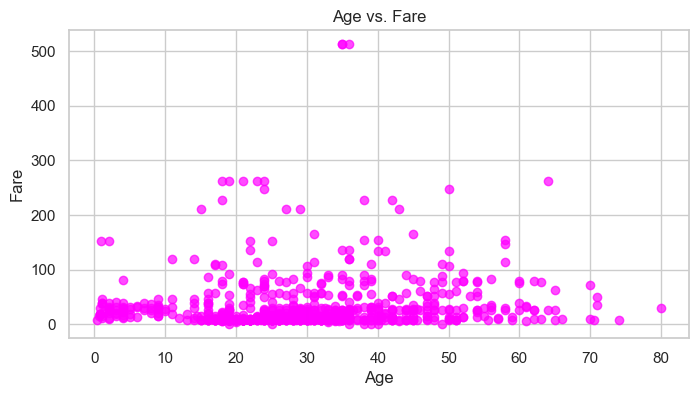

In [94]:
# Scatter Plot: Glucose Level vs. BMI
plt.figure(figsize=(8, 4))
plt.scatter(df['Age'], df['Fare'], color='magenta', alpha=0.7)
plt.title("Age vs. Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

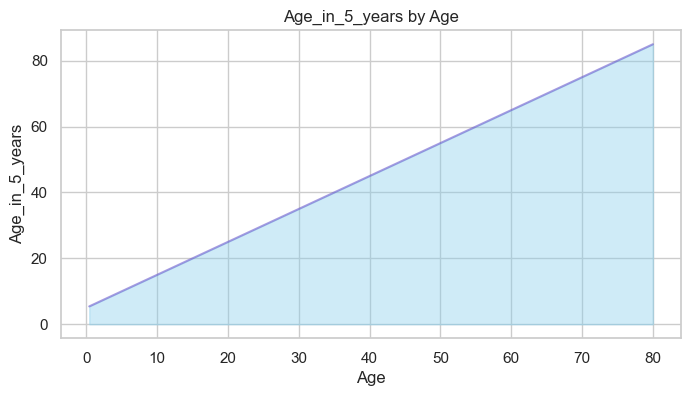

In [48]:
# %% [code]
# Area Plot: Daily Caloric Intake by Age (sorted by Age)
df["Age_in_5_years"] = df["Age"]+5

df_sorted = df.sort_values(by='Age')
plt.figure(figsize=(8, 4))
plt.fill_between(df_sorted['Age'], df_sorted['Age_in_5_years'], color="skyblue", alpha=0.4)
plt.plot(df_sorted['Age'], df_sorted['Age_in_5_years'], color="Slateblue", alpha=0.6)
plt.title("Age_in_5_years by Age")
plt.xlabel("Age")
plt.ylabel("Age_in_5_years")
plt.show()


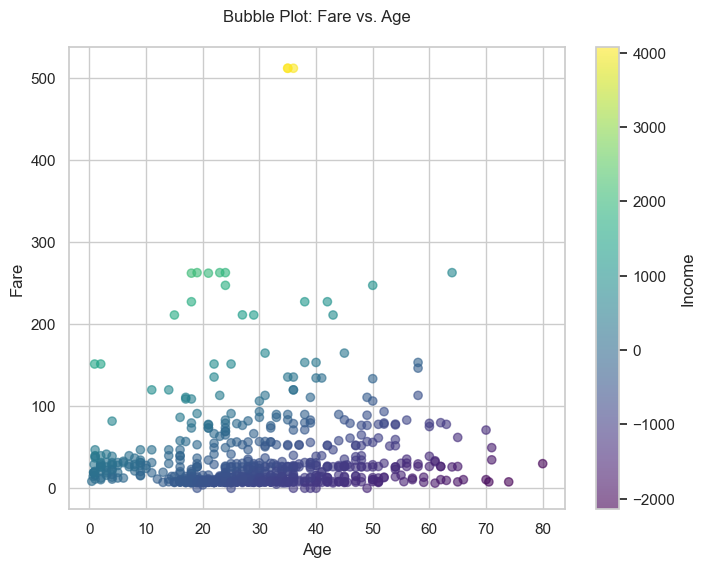

In [101]:
# %% [code]

df["Income"] = 10*df["Fare"] - 30*df["Age"] + np.random.normal(loc=0, scale=2, size=df.shape[0])
# Bubble Plot: BMI vs. Glucose Level (Bubble size represents Daily Caloric Intake, color indicates Age)
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Fare'], 
            #s=df['Age'] / 10,  # Adjust marker sizes as needed
            c=df['Income'], cmap='viridis', alpha=0.6)
plt.title("Bubble Plot: Fare vs. Age\n")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.colorbar(label='Income')
plt.show()


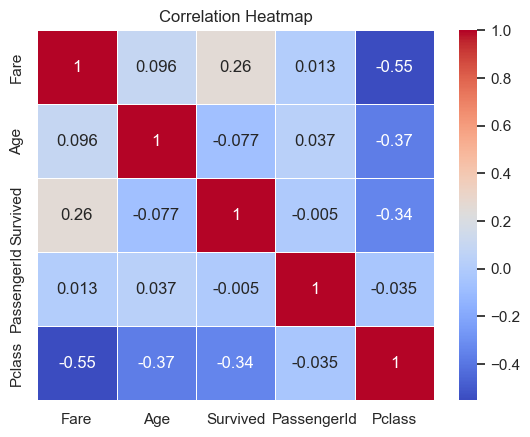

In [120]:
# Correlation Heatmap for selected numeric columns
cols = ['Fare', 'Age', 'Survived', 'PassengerId', "Pclass"]
corr = df[cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

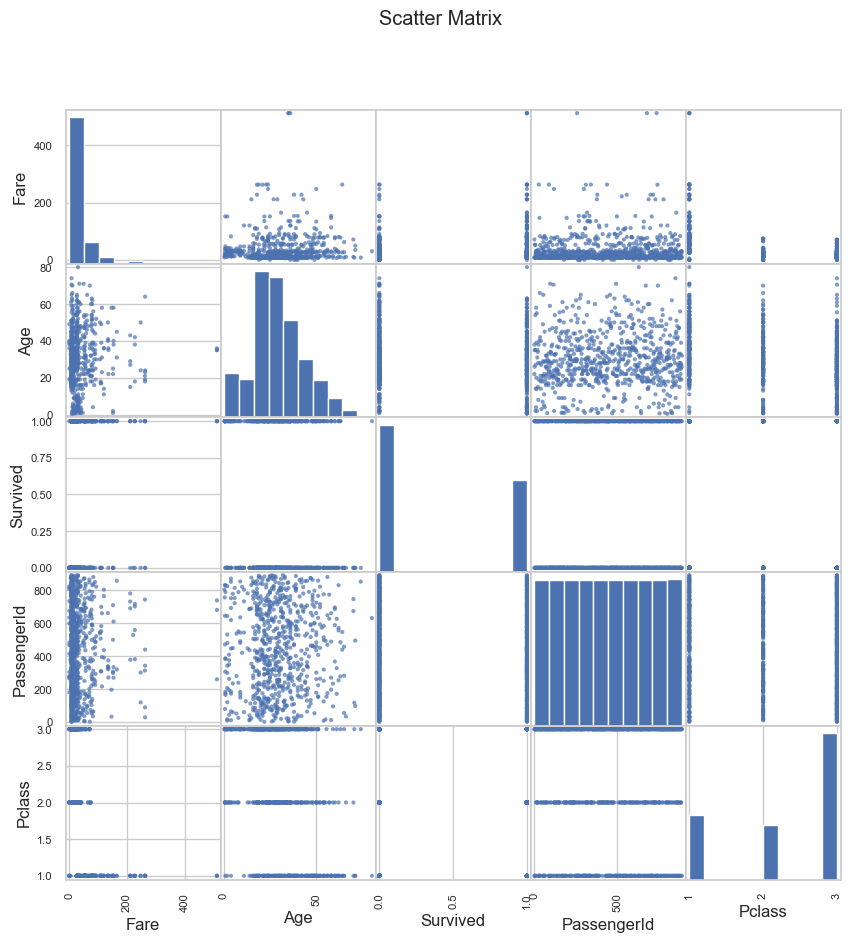

In [49]:
# Scatter Matrix (Pair Plot) for a subset of numeric columns
pd.plotting.scatter_matrix(df[['Fare', 'Age', 'Survived', 'PassengerId', "Pclass"]], figsize=(10, 10), alpha=0.7)
plt.suptitle("Scatter Matrix")
plt.show()

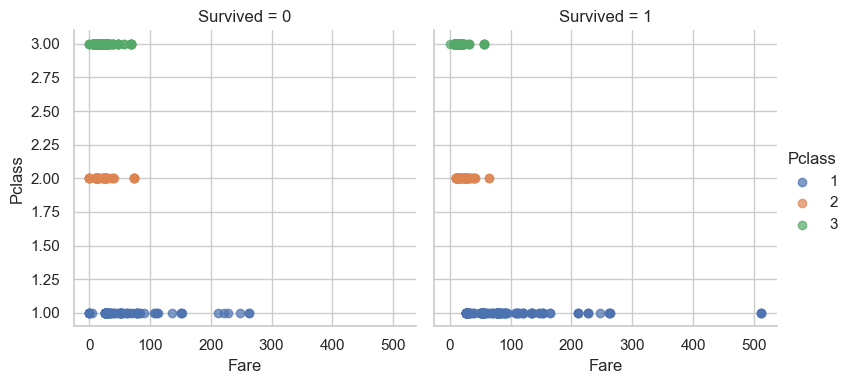

In [51]:
# Facet Grid: Scatter plot of BMI vs. Cholesterol separated by Gender and colored by Smoking Status
g = sns.FacetGrid(df, col="Survived", hue="Pclass", height=4)
g.map(plt.scatter, "Fare", "Pclass", alpha=0.7)
g.add_legend()
plt.show()

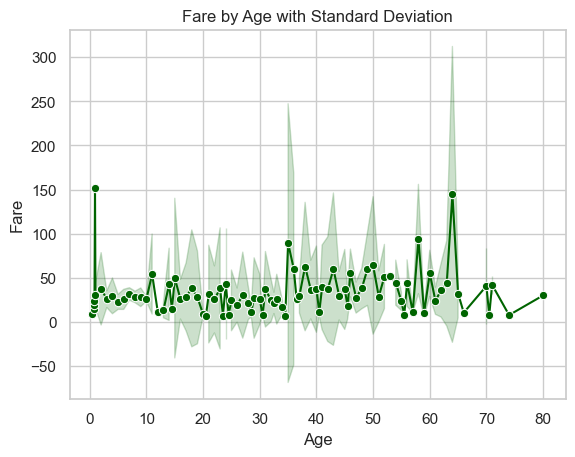

In [107]:
# Line Plot with Error Bars: Fare by Age (with confidence interval using Seaborn)
sns.lineplot(x='Age', y='Fare', data=df, errorbar='sd', marker='o', color='darkgreen')
plt.title("Fare by Age with Standard Deviation")
plt.show()

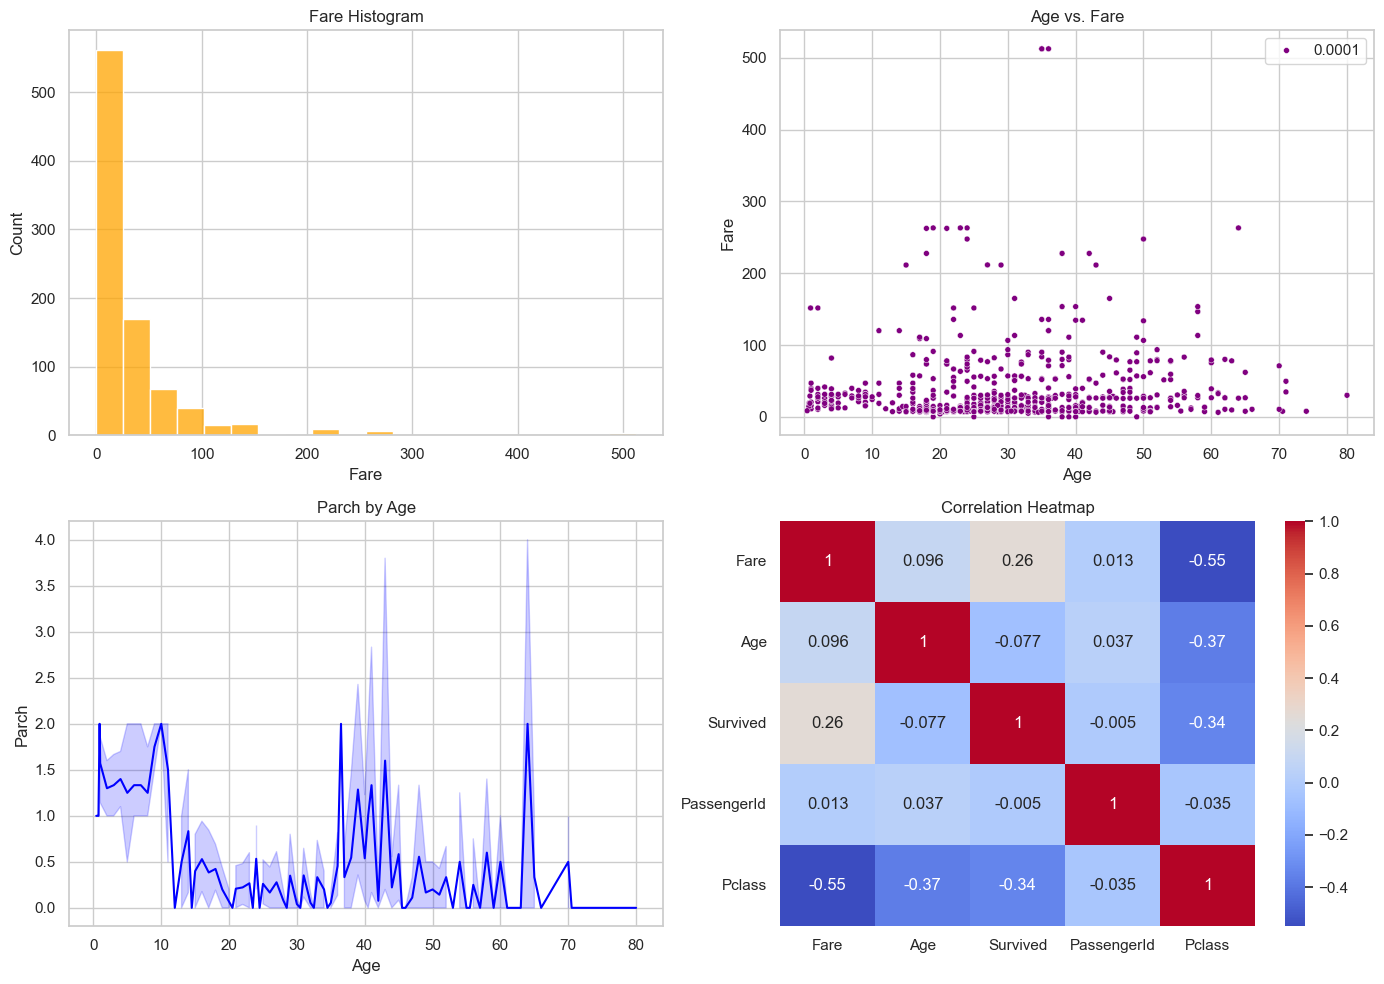

In [121]:
# Subplots: Combining different visualizations in one figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(df['Fare'], bins=20, ax=axes[0, 0], color='orange')
axes[0, 0].set_title("Fare Histogram")
sns.scatterplot(x='Age', y='Fare', data=df, ax=axes[0, 1], color='purple', size=0.0001)
axes[0, 1].set_title("Age vs. Fare")
sns.lineplot(x='Age', y='Parch', data=df, ax=axes[1, 0], color='blue')
axes[1, 0].set_title("Parch by Age")
sns.heatmap(corr, ax=axes[1, 1], annot=True, cmap='coolwarm')
axes[1, 1].set_title("Correlation Heatmap")
plt.tight_layout()
plt.show()

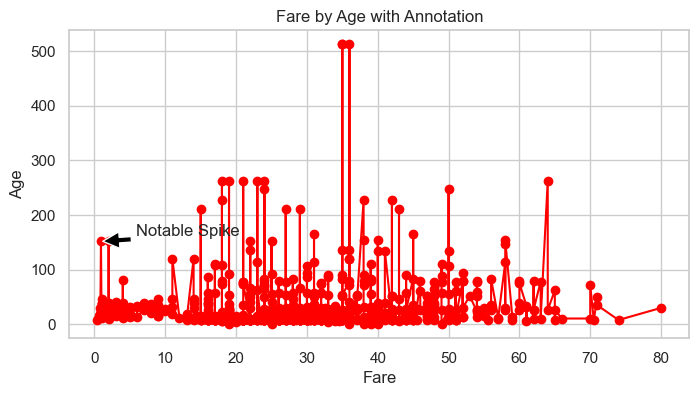

In [122]:
# Annotation Example: Fare by Age with a notable spike annotated
plt.figure(figsize=(8, 4))
df_sort = df.sort_values("Age")
plt.plot(df_sort['Age'], df_sort['Fare'], marker='o', color='red')
plt.title("Fare by Age with Annotation")
plt.xlabel("Fare")
plt.ylabel("Age")
# For the purpose of this demo, annotate the first occurrence where Fare is above a threshold
spike = df_sort[df_sort['Fare'] > df_sort['Fare'].quantile(0.9)].iloc[0]
plt.annotate('Notable Spike', xy=(spike['Age'], spike['Fare']),
             xytext=(spike['Age']+5, spike['Fare']+10),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

# Break1:

1)Given the dataframe attached "df1.csv", what is the distribution of "y"?

2)Given the dataframe attached "df2.csv", which columns contributed to creating the column "f"?

In [52]:
np.linspace(-10, 10, 100)

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [53]:
x = np.linspace(-10, 10, 100)
np.sin(x) * np.exp(-0.1 * x**2)

array([ 2.46985202e-05,  2.46928038e-05,  1.70704308e-05, -4.53467363e-06,
       -4.94022501e-05, -1.30226284e-04, -2.63259464e-04, -4.67778039e-04,
       -7.64449298e-04, -1.17211625e-03, -1.70250697e-03, -2.35247093e-03,
       -3.09358553e-03, -3.85940015e-03, -4.53121004e-03, -4.92406113e-03,
       -4.77561221e-03, -3.74139414e-03, -1.40071563e-03,  2.72227366e-03,
        9.11830442e-03,  1.82308449e-02,  3.03719635e-02,  4.56196879e-02,
        6.37048425e-02,  8.39002197e-02,  1.04929427e-01,  1.24915914e-01,
        1.41393477e-01,  1.51397038e-01,  1.51646138e-01,  1.38823271e-01,
        1.09935651e-01,  6.27336371e-02, -3.85597535e-03, -8.93356106e-02,
       -1.91341752e-01, -3.05507647e-01, -4.25531775e-01, -5.43479965e-01,
       -6.50321438e-01, -7.36667072e-01, -7.93646300e-01, -8.13832289e-01,
       -7.92108288e-01, -7.26364946e-01, -6.17930836e-01, -4.71665822e-01,
       -2.95686092e-01, -1.00735587e-01,  1.00735587e-01,  2.95686092e-01,
        4.71665822e-01,  

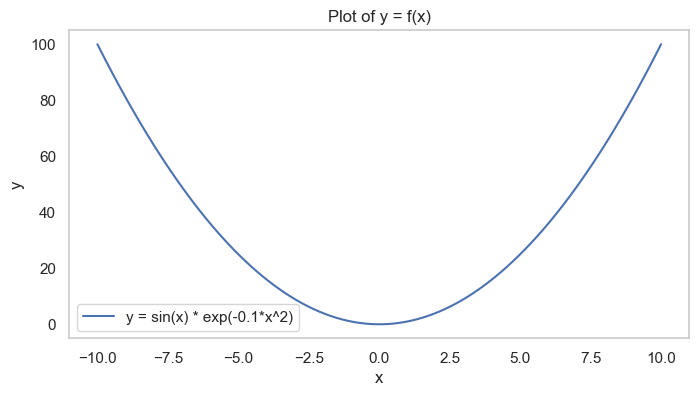

In [55]:
# Generate x values
x = np.linspace(-10, 10, 100)
# Define a function y = f(x)
#y = np.sin(x) * np.exp(-0.1 * x**2)
y = x**2
# Plot y = f(x)
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='y = sin(x) * exp(-0.1*x^2)', color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = f(x)')
plt.legend()
plt.grid()
plt.show()



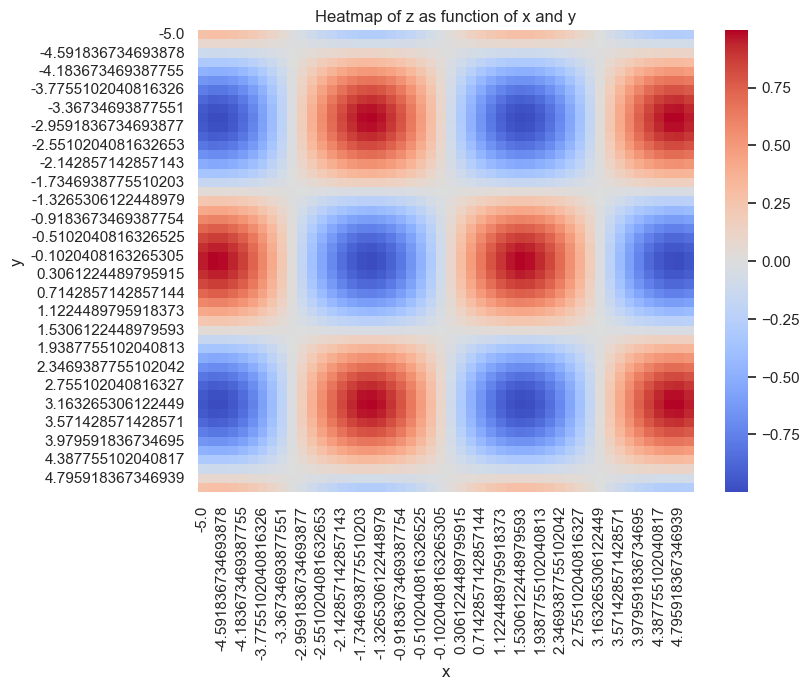

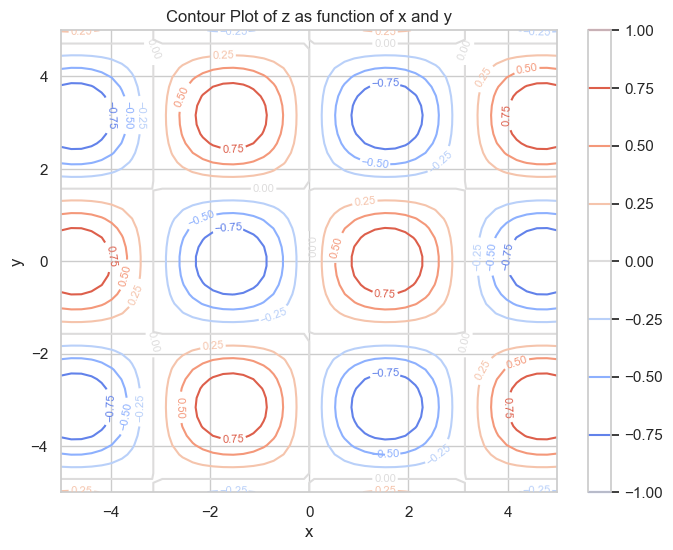

In [56]:
# Generate simulation data for heatmap
x_vals = np.linspace(-5, 5, 50)
y_vals = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x_vals, y_vals)
Z = np.sin(X) * np.cos(Y)  # Example function

# Convert to DataFrame
df_simulation = pd.DataFrame({'x': X.ravel(), 'y': Y.ravel(), 'z': Z.ravel()})

# Pivot the data for heatmap
heatmap_data = df_simulation.pivot(index='y', columns='x', values='z')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False)
plt.title('Heatmap of z as function of x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# Plot contour lines
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, cmap='coolwarm')
plt.clabel(contour, inline=True, fontsize=8)
plt.title('Contour Plot of z as function of x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

In [90]:
years = 100
periods = years*12
date_range = pd.date_range(start='2020-01-01', periods=periods, freq='M')

# Create a synthetic time series with trend and seasonality
trend = np.linspace(10, 50, periods)  # Linear trend
#trend[45] = trend[45]-20
seasonality = np.tile(1+0.5* np.sin(np.linspace(0, 2 * np.pi, 12)), years)  # Seasonal component
noise = np.random.normal(scale=3, size=periods)  # Random noise
time_series = trend * seasonality + noise

# Create a DataFrame
ts_df = pd.DataFrame({'Date': date_range, 'Value': time_series,
                      "seasonality": seasonality, "trend": trend, "noise": noise})
ts_df.set_index('Date', inplace=True)



In [62]:
np.tile(10 * np.sin(np.linspace(0, 2 * np.pi, 12)), years)

array([ 0.00000000e+00,  5.40640817e+00,  9.09631995e+00,  9.89821442e+00,
        7.55749574e+00,  2.81732557e+00, -2.81732557e+00, -7.55749574e+00,
       -9.89821442e+00, -9.09631995e+00, -5.40640817e+00, -2.44929360e-15,
        0.00000000e+00,  5.40640817e+00,  9.09631995e+00,  9.89821442e+00,
        7.55749574e+00,  2.81732557e+00, -2.81732557e+00, -7.55749574e+00,
       -9.89821442e+00, -9.09631995e+00, -5.40640817e+00, -2.44929360e-15,
        0.00000000e+00,  5.40640817e+00,  9.09631995e+00,  9.89821442e+00,
        7.55749574e+00,  2.81732557e+00, -2.81732557e+00, -7.55749574e+00,
       -9.89821442e+00, -9.09631995e+00, -5.40640817e+00, -2.44929360e-15,
        0.00000000e+00,  5.40640817e+00,  9.09631995e+00,  9.89821442e+00,
        7.55749574e+00,  2.81732557e+00, -2.81732557e+00, -7.55749574e+00,
       -9.89821442e+00, -9.09631995e+00, -5.40640817e+00, -2.44929360e-15,
        0.00000000e+00,  5.40640817e+00,  9.09631995e+00,  9.89821442e+00,
        7.55749574e+00,  

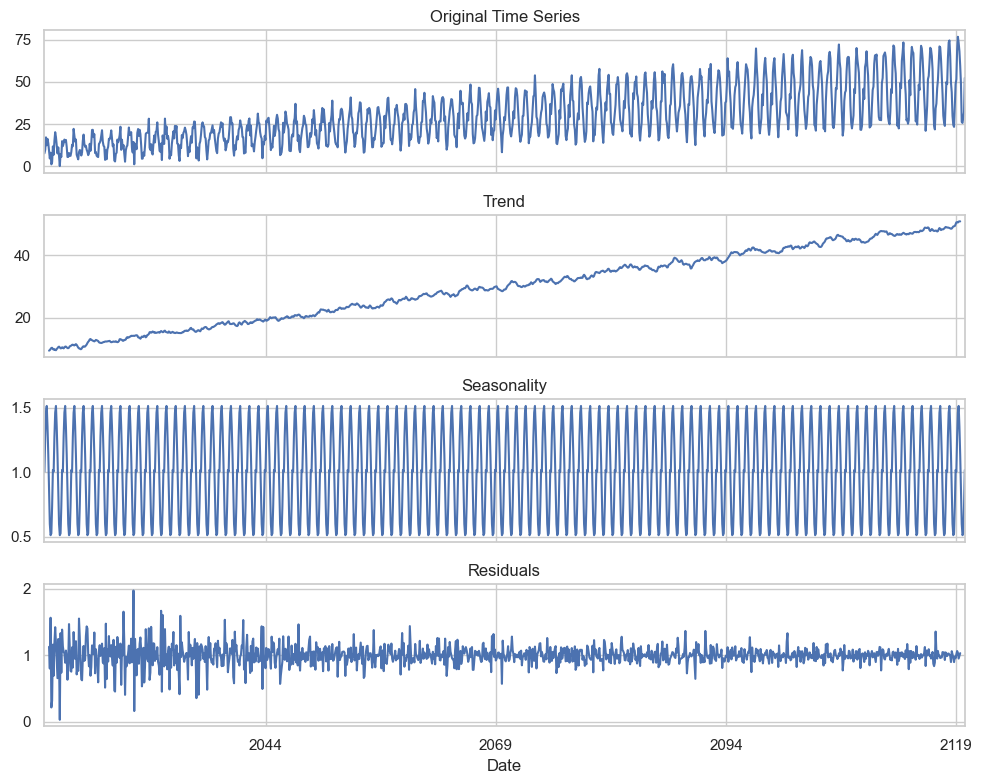

In [94]:
# Apply seasonal decomposition
result = seasonal_decompose(ts_df['Value'], model='multiplicative', period=12)

# Plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
ts_df['Value'].plot(ax=axes[0], title='Original Time Series')
result.trend.plot(ax=axes[1], title='Trend')
result.seasonal.plot(ax=axes[2], title='Seasonality')
result.resid.plot(ax=axes[3], title='Residuals')
plt.tight_layout()
plt.show()

# ST = T + S + R
# ST = T*S+R

In [66]:
ts_df

Value   seasonality      trend     noise
Date                                                    
2020-01-31  10.467285  0.000000e+00  10.000000  0.467285
2020-02-29  14.951408  5.406408e+00  10.336134 -0.791134
2020-03-31  21.282081  9.096320e+00  10.672269  1.513492
2020-04-30  17.124288  9.898214e+00  11.008403 -3.782329
2020-05-31  17.753560  7.557496e+00  11.344538 -1.148474
...               ...           ...        ...       ...
2029-08-31  38.223762 -7.557496e+00  48.655462 -2.874204
2029-09-30  42.415970 -9.898214e+00  48.991597  3.322588
2029-10-31  40.698193 -9.096320e+00  49.327731  0.466782
2029-11-30  47.384757 -5.406408e+00  49.663866  3.127300
2029-12-31  50.222419 -2.449294e-15  50.000000  0.222419

[120 rows x 4 columns]

<Axes: xlabel='Date'>

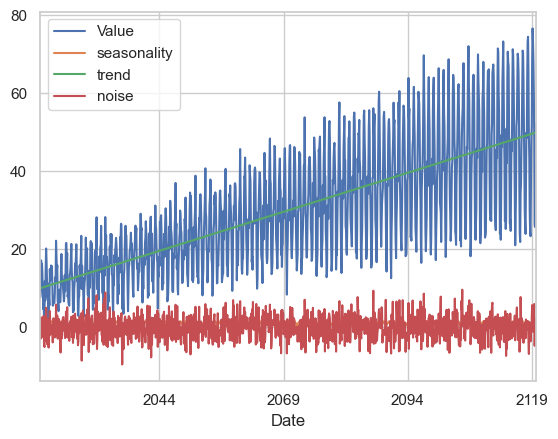

In [91]:
ts_df.plot()



# Break2:

1)Plot the function y = log(x), how can you improve its plot in critical areas?

2)Recreate the following heatmaps:

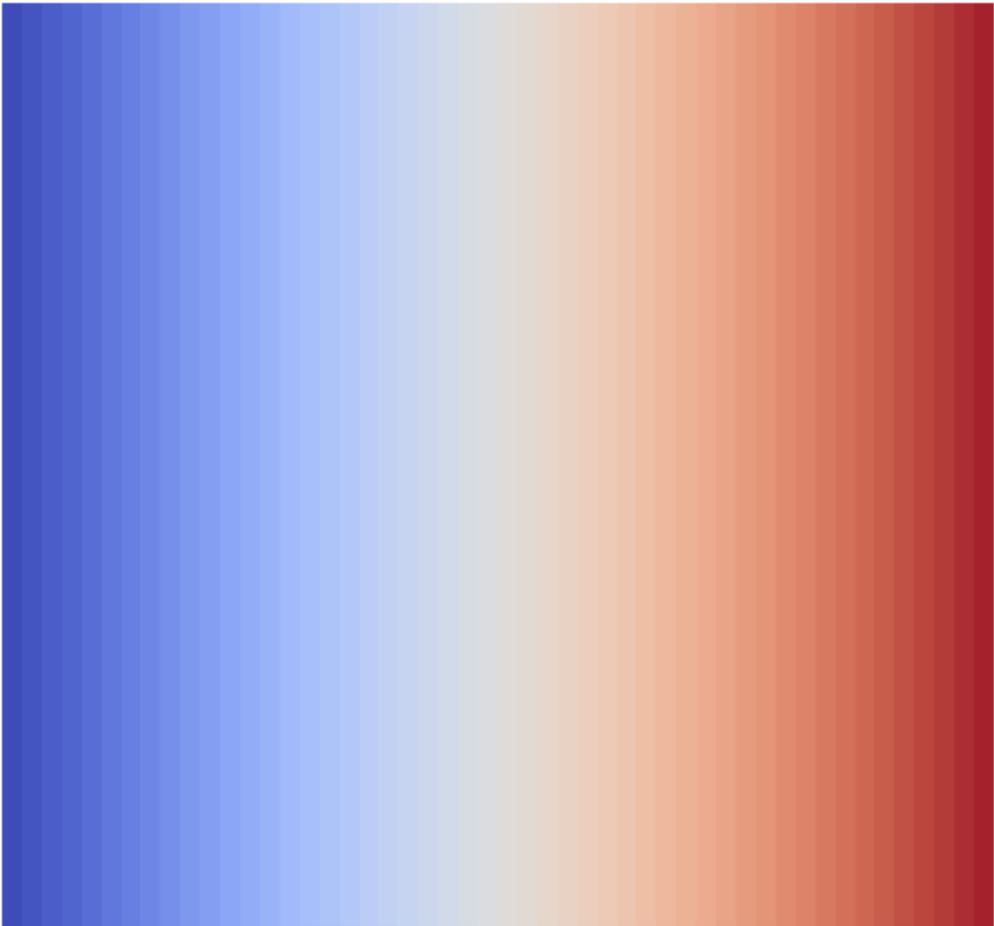,
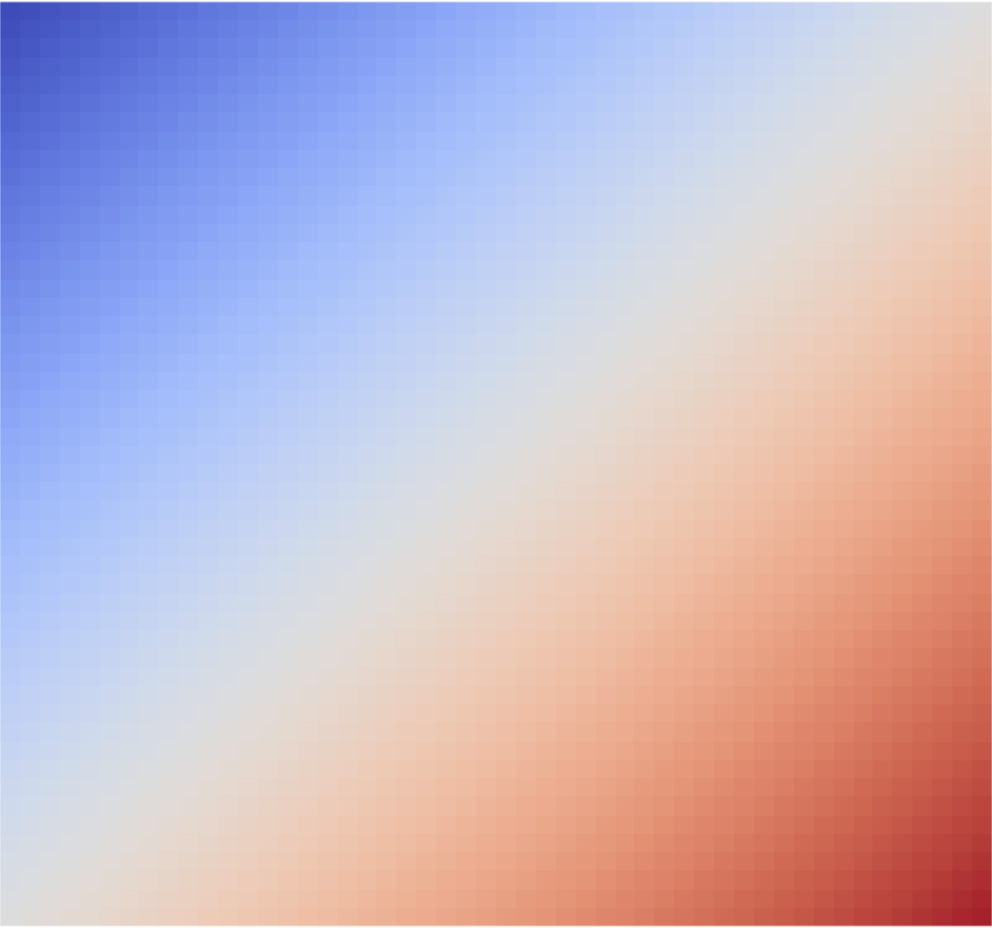,

# Homework:

1)Given the dataframe attached "df3.csv", which columns contributed to creating the column "f"?

2)Plot the function y = 1/x between -10 and 10 

3)Recreate the following heatmaps:

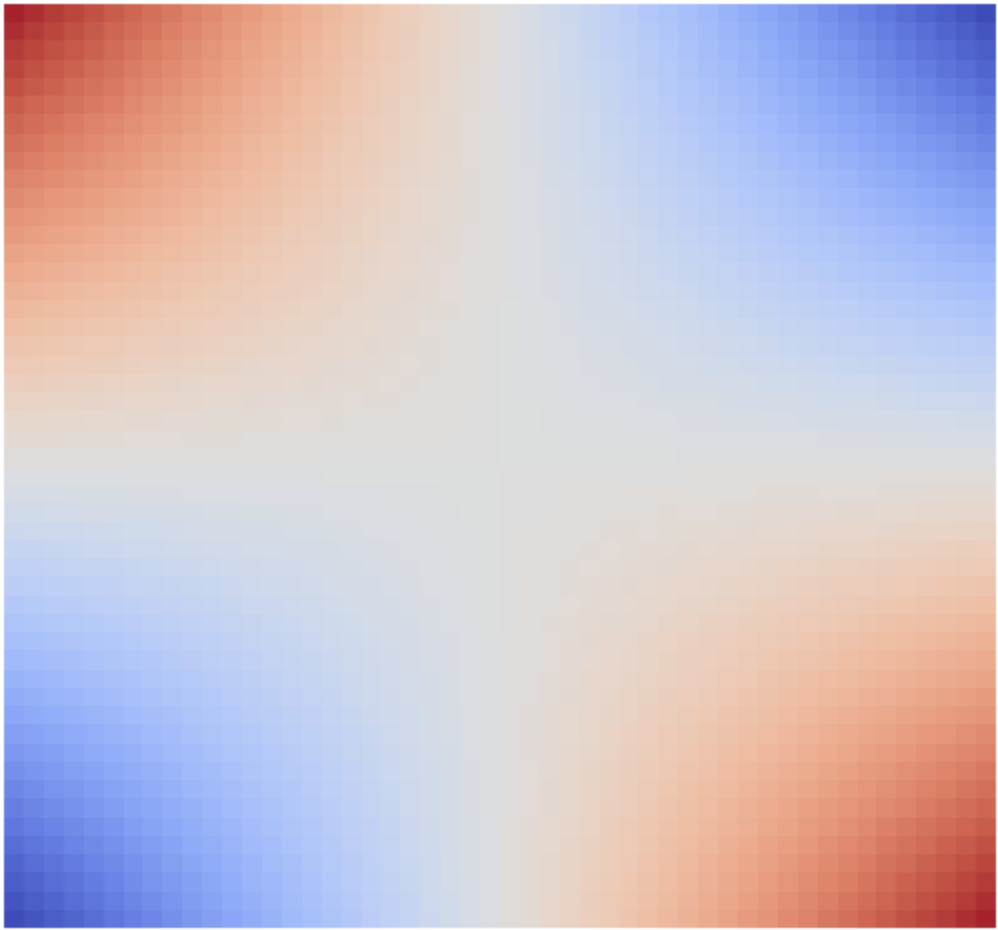,
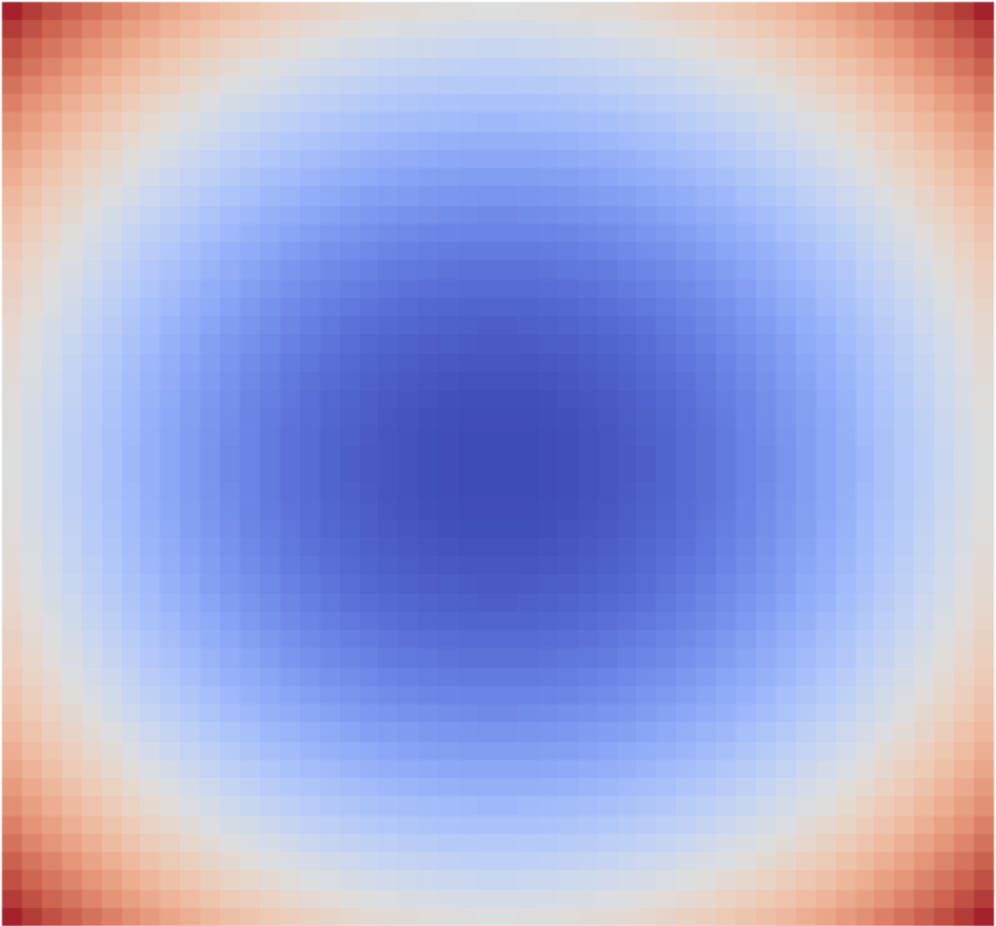,
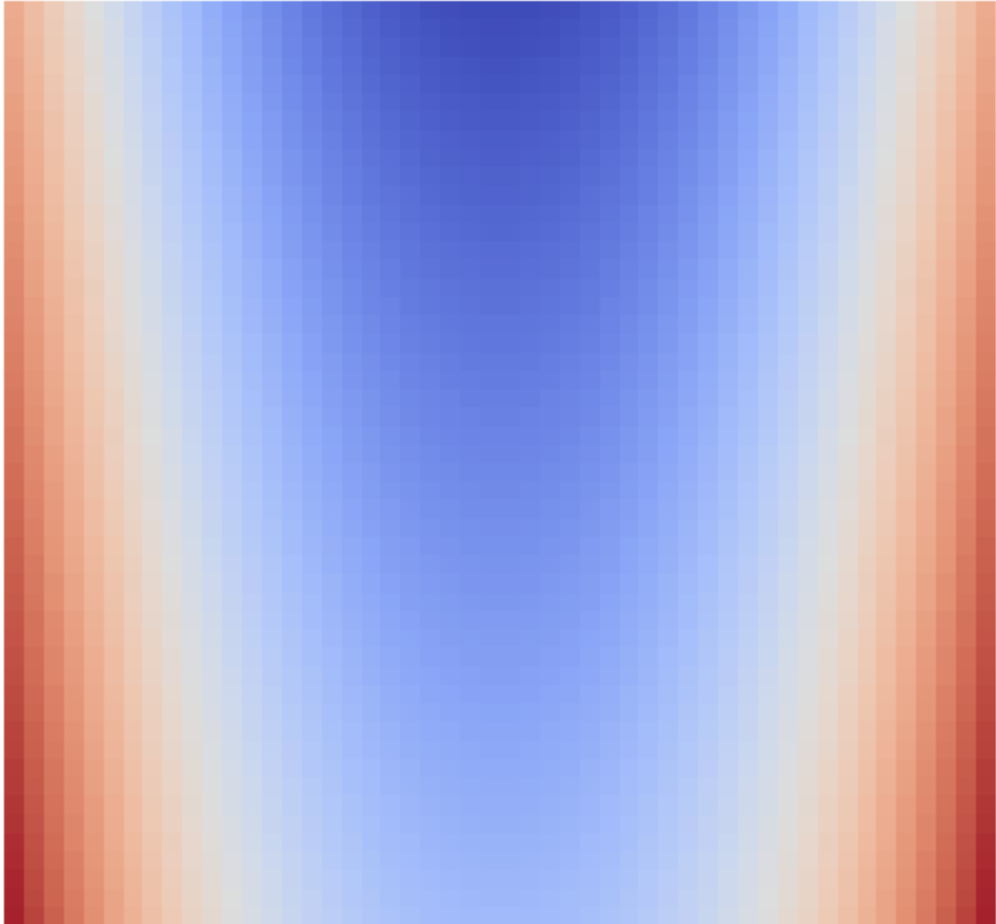

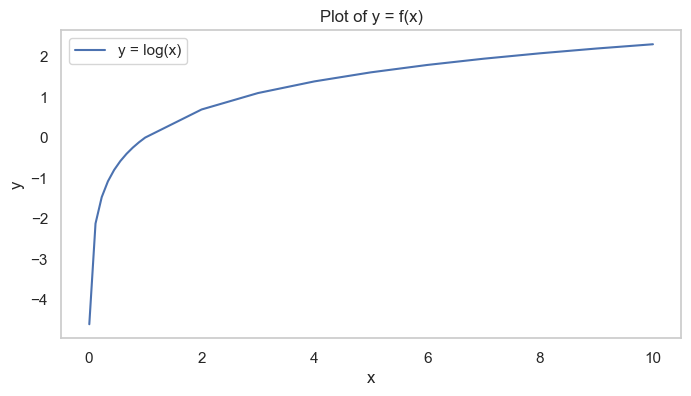

In [99]:
# Generate x values
x = np.append(np.linspace(0.01, 1, 10), np.linspace(1, 10, 10))
# Define a function y = f(x)
#y = np.sin(x) * np.exp(-0.1 * x**2)
y = np.log(x)
# Plot y = f(x)
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='y = log(x)', color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = f(x)')
plt.legend()
plt.grid()
plt.show()

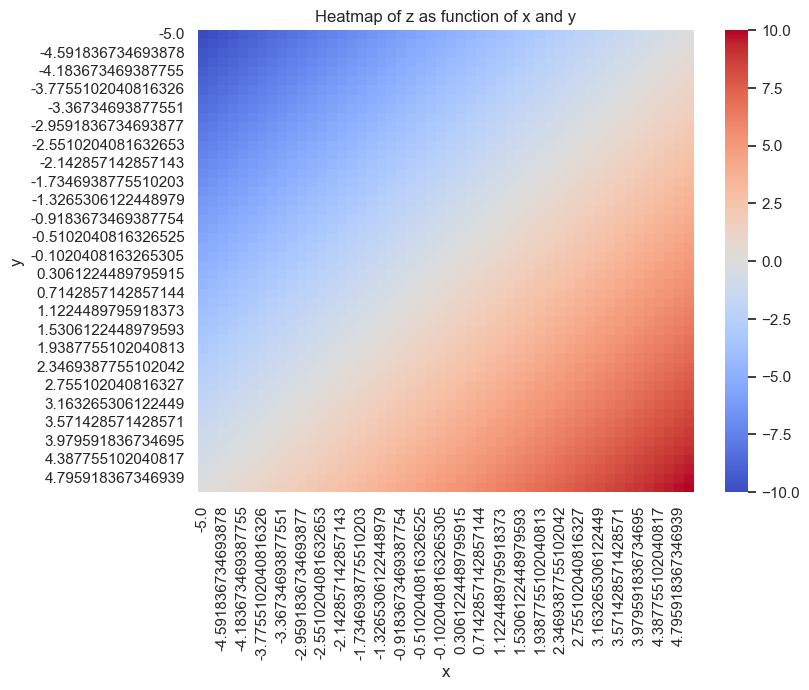

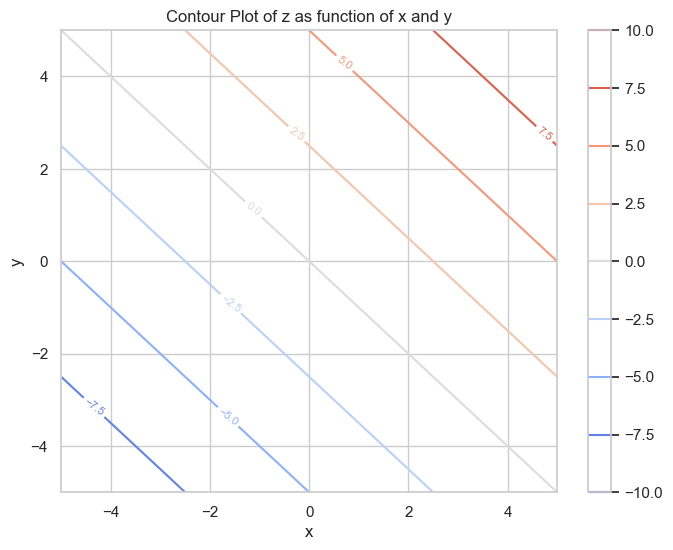

In [102]:
# Generate simulation data for heatmap
x_vals = np.linspace(-5, 5, 50)
y_vals = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x_vals, y_vals)
Z = X+Y  # Example function

# Convert to DataFrame
df_simulation = pd.DataFrame({'x': X.ravel(), 'y': Y.ravel(), 'z': Z.ravel()})

# Pivot the data for heatmap
heatmap_data = df_simulation.pivot(index='y', columns='x', values='z')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False)
plt.title('Heatmap of z as function of x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# Plot contour lines
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, cmap='coolwarm')
plt.clabel(contour, inline=True, fontsize=8)
plt.title('Contour Plot of z as function of x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()